In [ ]:
import pandas as pd

file_path = r'../pubchem_data/HTS\AID_1851_datatable_all.csv'
df = pd.read_csv(file_path, header=0, skiprows=[1, 2, 3, 4, 5])
print("--- DataFrame (from file) ---")
print(df.head())

--- DataFrame (from file) ---
   PUBCHEM_RESULT_TAG  PUBCHEM_SID  PUBCHEM_CID  \
0                   2       842238    6602638.0   
1                   3       842238    6602638.0   
2                   4       842238    6602638.0   
3                   5       842238    6602638.0   
4                   6       842250     644510.0   

                       PUBCHEM_EXT_DATASOURCE_SMILES PUBCHEM_ACTIVITY_OUTCOME  \
0          CCCC(=O)NC1=CC(=C(C=C1)N2CCN(CC2)CC)Cl.Cl             Inconclusive   
1          CCCC(=O)NC1=CC(=C(C=C1)N2CCN(CC2)CC)Cl.Cl                 Inactive   
2          CCCC(=O)NC1=CC(=C(C=C1)N2CCN(CC2)CC)Cl.Cl                 Inactive   
3          CCCC(=O)NC1=CC(=C(C=C1)N2CCN(CC2)CC)Cl.Cl             Inconclusive   
4  C1OC2=C(O1)C=C3C(=C2)C=C(C(=O)N3)CN(CCCO)CC4=N...             Inconclusive   

   PUBCHEM_ACTIVITY_SCORE  PUBCHEM_ACTIVITY_URL  PUBCHEM_ASSAYDATA_COMMENT  \
0                     NaN                   NaN                        NaN   
1                   

C:\Users\WooSomin\AppData\Local\Temp\ipykernel_9960\2343115005.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=0, skiprows=[1, 2, 3, 4, 5])


In [ ]:
df.isnull().sum()

PUBCHEM_RESULT_TAG                   0
PUBCHEM_SID                          0
PUBCHEM_CID                        110
PUBCHEM_EXT_DATASOURCE_SMILES      110
PUBCHEM_ACTIVITY_OUTCOME             0
PUBCHEM_ACTIVITY_SCORE           85714
PUBCHEM_ACTIVITY_URL             85714
PUBCHEM_ASSAYDATA_COMMENT        85714
Inhibition Observed                  0
Approved Drug                        0
Collection                       80144
Analysis Comment                 85714
Activity Score                       0
Potency                          45030
Curve_Description                42459
Fit_LogAC50                      42605
Fit_HillSlope                    42605
Fit_R2                           42605
Fit_InfiniteActivity             42605
Fit_ZeroActivity                 42605
Fit_CurveClass                       0
Excluded_Points                  42605
Max_Response                         0
Activity at 0.0007 uM            58388
Activity at 0.00160 uM           73751
Activity at 0.00368 uM   

In [ ]:
df = df[df['Panel Name'].str.lower().str.contains('cyp3a4')]


In [ ]:
df_sel = df[['PUBCHEM_EXT_DATASOURCE_SMILES', 'Activity at 11.43 uM']]
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17143 entries, 1 to 85711
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PUBCHEM_EXT_DATASOURCE_SMILES  17121 non-null  object 
 1   Activity at 11.43 uM           16223 non-null  float64
dtypes: float64(1), object(1)
memory usage: 401.8+ KB


In [ ]:
df_sel.isnull().sum()

PUBCHEM_EXT_DATASOURCE_SMILES     22
Activity at 11.43 uM             920
dtype: int64

In [ ]:
df_sel = df_sel.dropna()
df_sel.isnull().sum()

PUBCHEM_EXT_DATASOURCE_SMILES    0
Activity at 11.43 uM             0
dtype: int64

In [ ]:
# 양수인 행 삭제 (또는 0 이상인 값 삭제)
df_sel = df_sel[df_sel['Activity at 11.43 uM'] < 0]

In [ ]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13218 entries, 6 to 85711
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PUBCHEM_EXT_DATASOURCE_SMILES  13218 non-null  object 
 1   Activity at 11.43 uM           13218 non-null  float64
dtypes: float64(1), object(1)
memory usage: 309.8+ KB


In [ ]:
import pandas as pd
from rdkit import Chem
import io

def smiles_to_canonical(smiles_str):
    try:
        mol = Chem.MolFromSmiles(smiles_str)
        if mol is not None:
            return Chem.MolToSmiles(mol)
        return None
    except:
        return None

df_sel['Canonical_Smiles'] = df_sel['PUBCHEM_EXT_DATASOURCE_SMILES'].apply(smiles_to_canonical)

In [ ]:
df_sel.rename(columns={'Activity at 11.43 uM': 'Inhibition'}, inplace=True)
df_pre = df_sel.copy()

In [ ]:
df_pre = df_pre[['Canonical_Smiles', 'Inhibition']]
df_pre

,Canonical_Smiles,Inhibition
6,O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...,-82.0127
11,CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21,-52.8656
16,CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1,-47.8371
21,Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1,-15.4369
26,COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1,-86.4159
...,...,...
85691,C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2,-4.0397
85696,O=C1[C@@H]2[C@H]3C(=CC[C@@H]2C(=O)N1Cc1ccccc1)...,-21.2044
85701,CCN1C(=O)[C@@H]2[C@H]3C(=CC[C@@H]2C1=O)C1(OCCC...,-21.3967
85706,C[C@H](c1ccccc1)N1C(=O)[C@H]2[C@@H]3[C@H](O)[C...,-18.1157


In [ ]:
# 음수 값들을 양수로 변환
df_pre['Inhibition'] = df_pre['Inhibition'].abs()

In [ ]:
df_pre['Inhibition'] = df_pre['Inhibition'].apply(lambda x: min(x, 100))

In [ ]:
print("\n--- df_pre after transformations ---")
df_pre.info()
print("\n", df_pre.head())


--- df_pre after transformations ---
<class 'pandas.core.frame.DataFrame'>
Index: 13218 entries, 6 to 85711
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Canonical_Smiles  13218 non-null  object 
 1   Inhibition        13218 non-null  float64
dtypes: float64(1), object(1)
memory usage: 309.8+ KB

                                      Canonical_Smiles  Inhibition
6   O=c1[nH]c2cc3c(cc2cc1CN(CCCO)Cc1nnnn1Cc1ccc(F)...     82.0127
11       CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21     52.8656
16         CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1     47.8371
21                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1     15.4369
26    COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1     86.4159


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

--- 'Inhibition' 컬럼의 기술 통계량 ---
count    13218.000000
mean        33.349629
std         28.338477
min          0.000100
25%          9.242825
50%         24.099400
75%         53.273950
max        100.000000
Name: Inhibition, dtype: float64


정제된 데이터가 'C:\Users\WooSomin\Desktop\AI신약개발\데이콘\processed_data\aid_1851_cyp3a4.csv'으로 저장되었습니다.


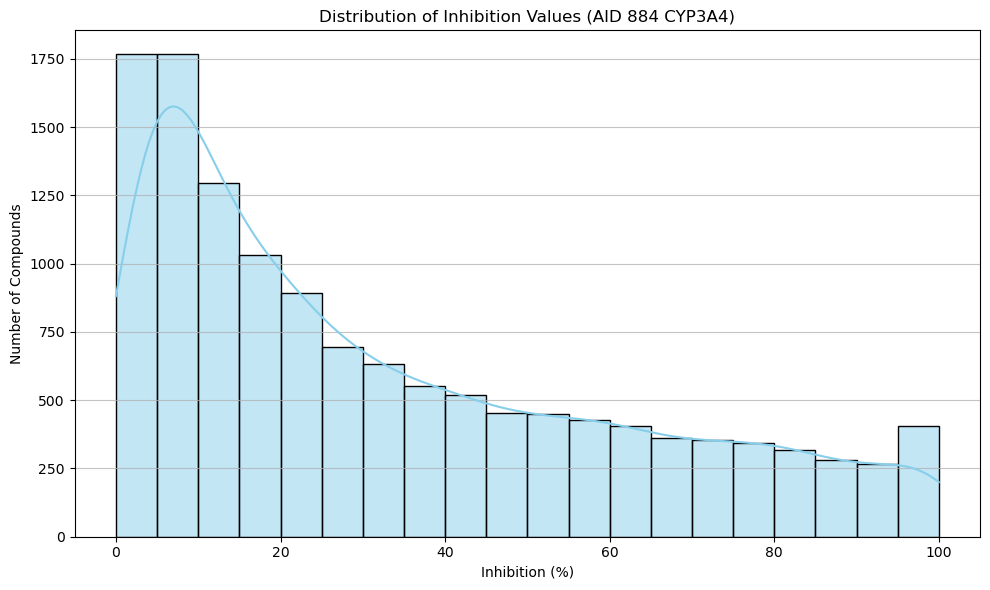

In [ ]:
print("--- 'Inhibition' 컬럼의 기술 통계량 ---")
print(df_pre['Inhibition'].describe())
print("\n")

plt.figure(figsize=(10, 6))
sns.histplot(df_pre['Inhibition'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Inhibition Values (AID 1851 CYP3A4)')
plt.xlabel('Inhibition (%)')
plt.ylabel('Number of Compounds')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()

output_csv_file_name = r'../processed_data/aid_1851_cyp3a4.csv'
df_pre.to_csv(output_csv_file_name, index=False)

print(f"정제된 데이터가 '{output_csv_file_name}'으로 저장되었습니다.")